In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [118]:
img = cv2.imread('letter_00000.jpg')
img = cv2.resize(img, (512, 512))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

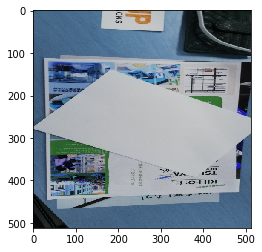

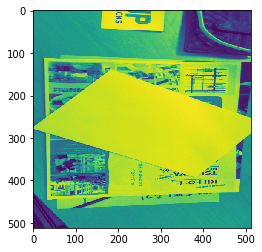

In [119]:
# test show all images.

plt.imshow(img)
plt.show()

plt.imshow(gray)
plt.show()

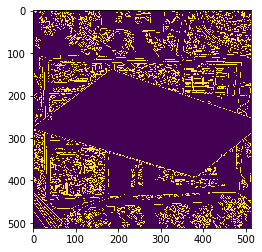

In [101]:
edges = cv2.Canny(gray, 0, 50, apertureSize = 3)

plt.imshow(edges)
plt.show()

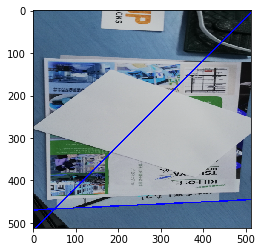

In [93]:
mg = img
lines = cv2.HoughLines(edges, 1, np.pi/200, 100)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img, (x1,y1),(x2,y2),(0,0,255),2)
    
plt.imshow(img)
plt.show()

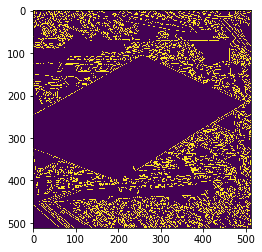

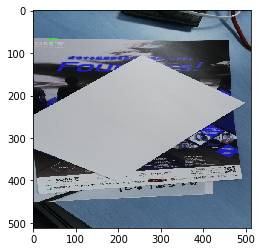

In [8]:
img = cv2.imread('letter_00002.jpg')
img = cv2.resize(img, (512, 512))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 0, 50, apertureSize = 3)

plt.imshow(edges)
plt.show()

minLineLength = 10
maxLineGap = 10
lines = cv2.HoughLinesP(edges, 1, np.pi/180,100, minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
plt.imshow(img)
plt.show()

In [6]:
import cv2
import numpy as np

src = cv2.imread('letter_00000.jpg', 0)
src = cv2.resize(src, (256, 256))
dst = src.copy()

def threshold(x):
    global dst
    ret, dst = cv2.threshold(src, x, 255, cv2.THRESH_BINARY)

cv2.namedWindow('Image')
cv2.createTrackbar('Threshold', 'Image', 0, 255, threshold)

while(True):
    cv2.imshow('Image', dst)

    key = cv2.waitKey(1)
    if key == 27:
        break

    # get current threshold.
    thresh = cv2.getTrackbarPos('Threshold', 'Image')

cv2.destroyAllWindows()

KeyboardInterrupt: 

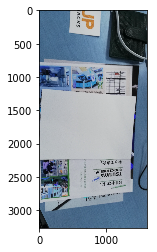

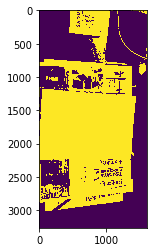

In [17]:
# test_otsu
img = cv2.imread('letter_00001.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#gray = cv2.GaussianBlur(img, img, (5, 5), 8)
ret, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)    

plt.imshow(img)
plt.show()

plt.imshow(th2)
plt.show()